In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 20 11:14:14 2020
@contact: atto / abatt@univ-smb.fr 
"""

from scipy.io import loadmat
import sounddevice as sd
DataParole = loadmat('DataParole.mat')
DataParole = DataParole['DataParole']
wait = input("Ajuster le volume - Puis Appuyer sur une touche du clavier pour continuer.")
sd.play(DataParole, 8192) # son emis via haut parleur externe 

Text(0.5, 1.0, 'Données de parole')

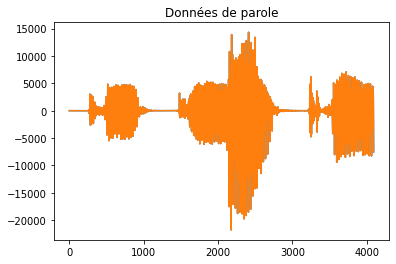

In [2]:
import matplotlib.pyplot as plt
plt.plot(DataParole)
# Visualisation de la donnée de parole 
plt.plot(DataParole)
plt.title('Données de parole')


In [3]:
def lpc(mat, ordre):
    ys=[]
    for i in range(ordre+1):
        ys.append(np.matrix.transpose(np.array([0]*i + mat + [0]*(ordre-i))))

    array = []
    for y in ys:
        array.append(y)
    
    A = np.array(array)

    D = np.cov(A)

    E = np.matmul(-np.linalg.inv(D[0:ordre, 0:ordre]),np.matrix.transpose(D[0,1:ordre+1]))
    E1 = [1, *np.matrix.transpose(E)]

    return E1

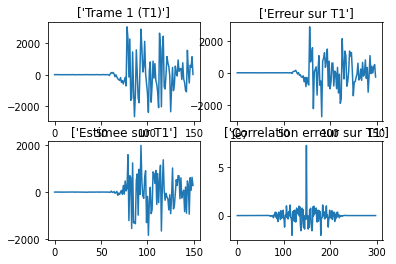

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter
import math

# Nous allons proceder a l' analyse par trames (fenetres) sur y
#   PARAMETRES D ANALYSE
# n1 et n2 sont les debut et fin de la série a analyser
n1 = 200
n2 = len(DataParole)

y = [] 
for i in DataParole[n1-1:n2]:
    y.append(i[0])
#y= np.transpose(np.array(DataParole[n1:n2]))
m=150 # longueur de chaque trame d analyse est m
NbTrames = math.floor((n2-n1+1)/m)
ordreAR=8   # ordre du modele AR

# Premiere trame
y1 = y[0:m]

coeffsAR1 = lpc(y1, ordreAR)

yf1 = lfilter(coeffsAR1,1,y1)

residuel = y1-yf1
residuel = np.transpose(np.array(residuel))  # erreur residuelle d estimation


ax1 = plt.subplot(221)
ax1 = plt.plot(y1)
ax1 = plt.title(['Trame 1 (T1)'])
ax2 = plt.subplot(222)
ax2 = plt.plot(yf1)
ax2 = plt.title(['Erreur sur T1'])
ax3 = plt.subplot(223)
ax3 = plt.plot(y1-yf1)
ax3 = plt.title(['Estimee sur T1'])
ax4 = plt.subplot(224)
ax4 = plt.plot(np.correlate(yf1, yf1,'full'))
ax4 = plt.title(['Correlation erreur sur T1'])



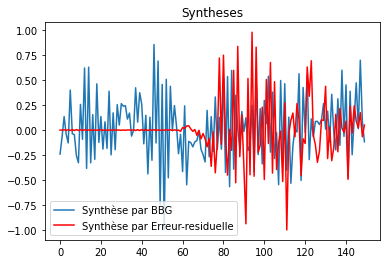

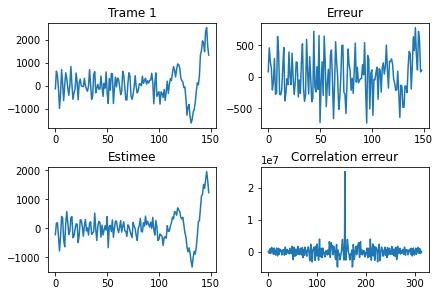

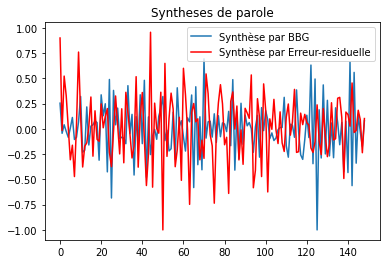

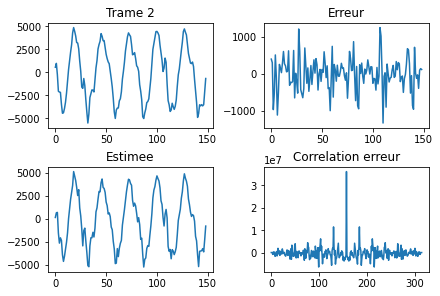

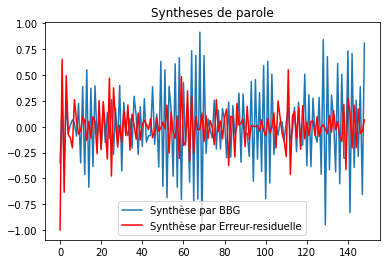

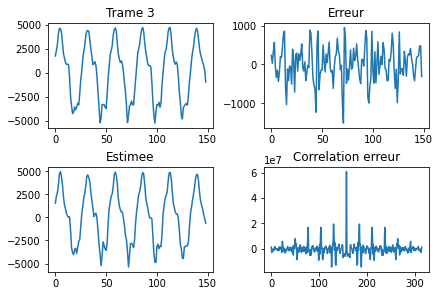

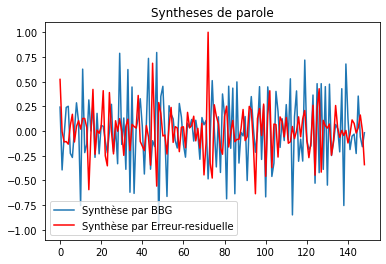

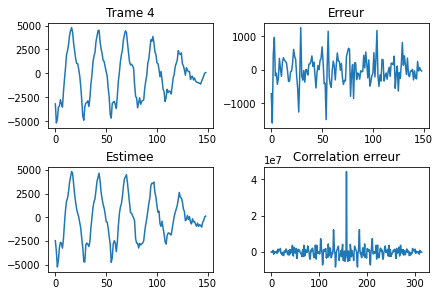

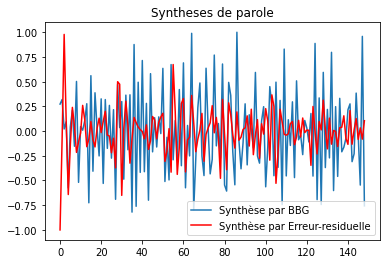

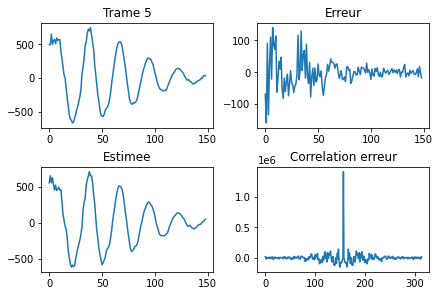

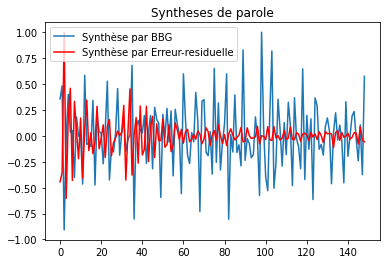

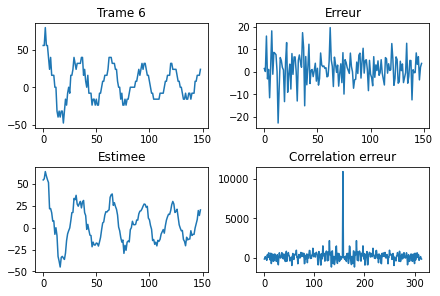

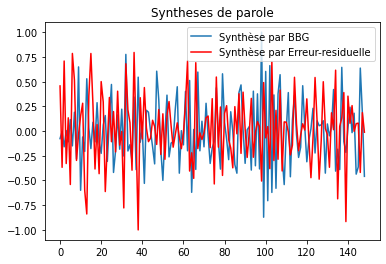

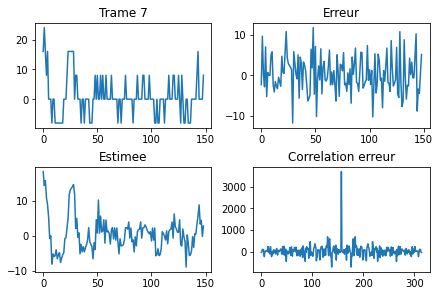

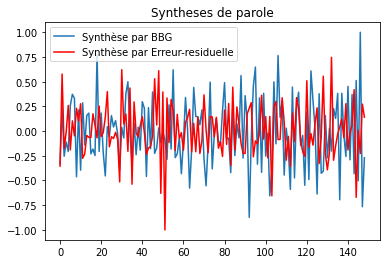

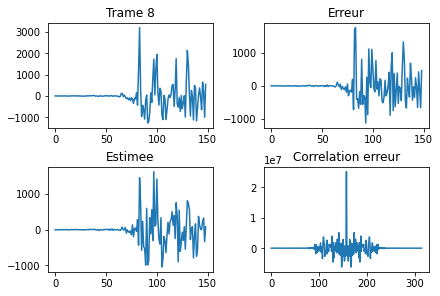

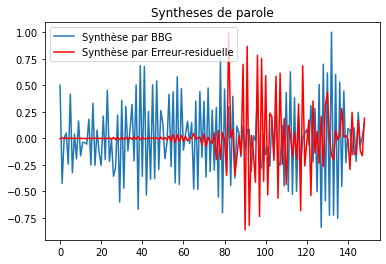

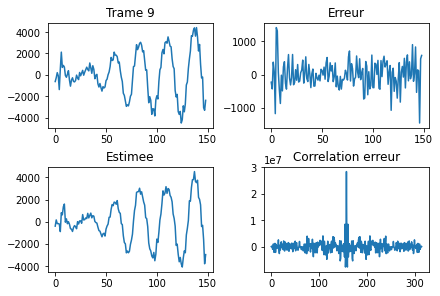

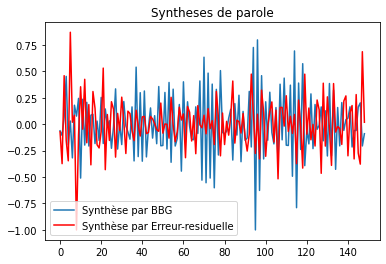

In [5]:
Synth2 = np.transpose(np.array(lfilter(coeffsAR1,1,np.random.normal(size=len(y1)))))
Synth3 = np.transpose(np.array(lfilter(coeffsAR1,1,yf1)))


plt.plot(Synth2/max(abs(Synth2)))

plt.plot(Synth3/max(abs(Synth3)),'r')

plt.title('Syntheses')
plt.legend(['Synthèse par BBG', 'Synthèse par Erreur-residuelle'])


NbTramesAffichees = 10;  # doit etre inferieur a  NbTrames
m1=ordreAR+1; 

for k in range(1,NbTrames-1):
    y2 = y[k*m - m1 + 1 : (k+1)*m]
    # calcul des coefficients d'un AR d'ordre n
    coeffsAR2=lpc(y2,ordreAR)
    yf2=lfilter(coeffsAR2,1,y2)
    residuel2 = y2[m1:m1+m-1]-yf2[m1:m1+m-1]
    residuel = [*residuel,*residuel2]
    synth2 = np.transpose(np.array(lfilter(coeffsAR2,1,np.random.normal(size=len(y2)))))
    synth3 = np.transpose(np.array(lfilter(coeffsAR2,1,yf2)))
    synth2 = synth2[m1:m1+m-1]
    synth3 = synth3[m1:m1+m-1]
    Synth2 = [*Synth2,*synth2]
    Synth3 = [*Synth3,*synth3]
    if (k <= NbTramesAffichees-1):
        ax1 = plt.figure(constrained_layout=True)
        ax1 = plt.subplot(221)
        ax1 = plt.plot(y2[m1:m1+m-1])
        ax1 = plt.title('Trame '+str((k)))
        ax2 = plt.subplot(222)
        ax2 = plt.plot(yf2[m1:m1+m-1])
        ax2 = plt.title('Erreur')
        ax3 = plt.subplot(223)
        ax3 = plt.plot(residuel2)
        ax3 = plt.title('Estimee')
        ax4 = plt.subplot(224)
        ax4 = plt.plot(np.correlate(yf2, yf2,'full'))
        ax4 = plt.title('Correlation erreur')
      
        ax5 = plt.figure()
        ax5 = plt.plot(synth2/max(abs(synth2))) 
        ax5 = plt.plot(synth3/max(abs(synth3)),'r')
        ax5 = plt.legend(['Synthèse par BBG', 'Synthèse par Erreur-residuelle'])
        ax5 = plt.title('Syntheses de parole')
    
     
  

sd.play(y) # parole originelle

#sd.play(residuel) # parole estimée

#sd.play(Synth3) # parole synthétisée avec l'erreur d'estimation

#sd.play(Synth2) # parole synthétisée avec bruit blanc gaussien


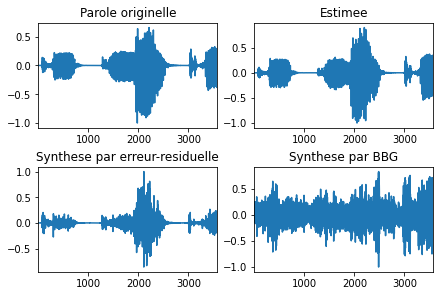

In [6]:
# Affichage de l'ensemble des traitements
L = len(residuel)

ax1 = plt.figure(constrained_layout=True)
ax1 = plt.subplot(221)
ax1.set_xlim(1,L)
ax1 = plt.plot(y[0:L]/max(abs(i) for i in y[0:L]))
ax1 = plt.title('Parole originelle')
ax2 = plt.subplot(222)
ax2.set_xlim(1,L)
ax2 = plt.plot(residuel/max(abs(i) for i in residuel))
ax2 = plt.title('Estimee')
ax3 = plt.subplot(223)
ax3.set_xlim(1,L)
ax3 = plt.plot(Synth3/max(abs(i) for i in Synth3))
ax3 = plt.title('Synthese par erreur-residuelle')
ax4 = plt.subplot(224)
ax4.set_xlim(1,L)
ax4 = plt.plot(Synth2/max(abs(i) for i in Synth2))
ax4 = plt.title('Synthese par BBG')